# Tuning the adversarial training parameter


In this notebook, the calibration of the QRNN on the validation set  is monitored, in order to tune the perturbation strength of the adversarial training.

In [2]:
import utils.config
import numpy as np
import matplotlib.pyplot as plt
x_val = np.load("data/x_val.npy")
y_val = np.load("data/y_val.npy")
y_val_pred = np.load("data/y_val_pred.npy")

In [3]:
%env KERAS_BACKEND=tensorflow
from typhon.retrieval.qrnn import QRNN
qrnn = QRNN.load("models/qrnn_5_512")
qrnn_01 = QRNN.load("models/qrnn_5_512_adversarial_01")
qrnn_005 = QRNN.load("models/qrnn_5_512_adversarial_005")
qrnn_001 = QRNN.load("models/qrnn_5_512_adversarial_001")

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [5]:
y_pred_qrnn  = qrnn.predict(x_val)
y_pred_qrnn_01  = qrnn_01.predict(x_val)
y_pred_qrnn_005 = qrnn_005.predict(x_val)
y_pred_qrnn_001 = qrnn_001.predict(x_val)

In [10]:
inds = np.all(y_val_pred[:, [0]] > 0.0, axis = 1)
fractions = np.zeros((4, 5))
for i in range(5):
    inds_lt = y_pred_qrnn[inds, 4 - i] <= y_val[inds]
    inds_gt = y_pred_qrnn[inds, 6 + i] > y_val[inds]
    fractions[0, i] = np.mean(inds_gt * inds_lt)
    
    inds_lt = y_pred_qrnn_01[inds, 4 - i] <= y_val[inds]
    inds_gt = y_pred_qrnn_01[inds, 6 + i] > y_val[inds]
    fractions[1, i] = np.mean(inds_gt * inds_lt)
    
    inds_lt = y_pred_qrnn_005[inds, 4 - i] <= y_val[inds]
    inds_gt = y_pred_qrnn_005[inds, 6 + i] > y_val[inds]
    fractions[2, i] = np.mean(inds_gt * inds_lt)
    
    inds_lt = y_pred_qrnn_001[inds, 4 - i] <= y_val[inds]
    inds_gt = y_pred_qrnn_001[inds, 6 + i] > y_val[inds]
    fractions[3, i] = np.mean(inds_gt * inds_lt)


Bad key "axes.formatter.min_exponent" on line 233 in
/home/simonpf/.config/matplotlib/paper.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/home/simonpf/build/anaconda/lib/python3.6/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


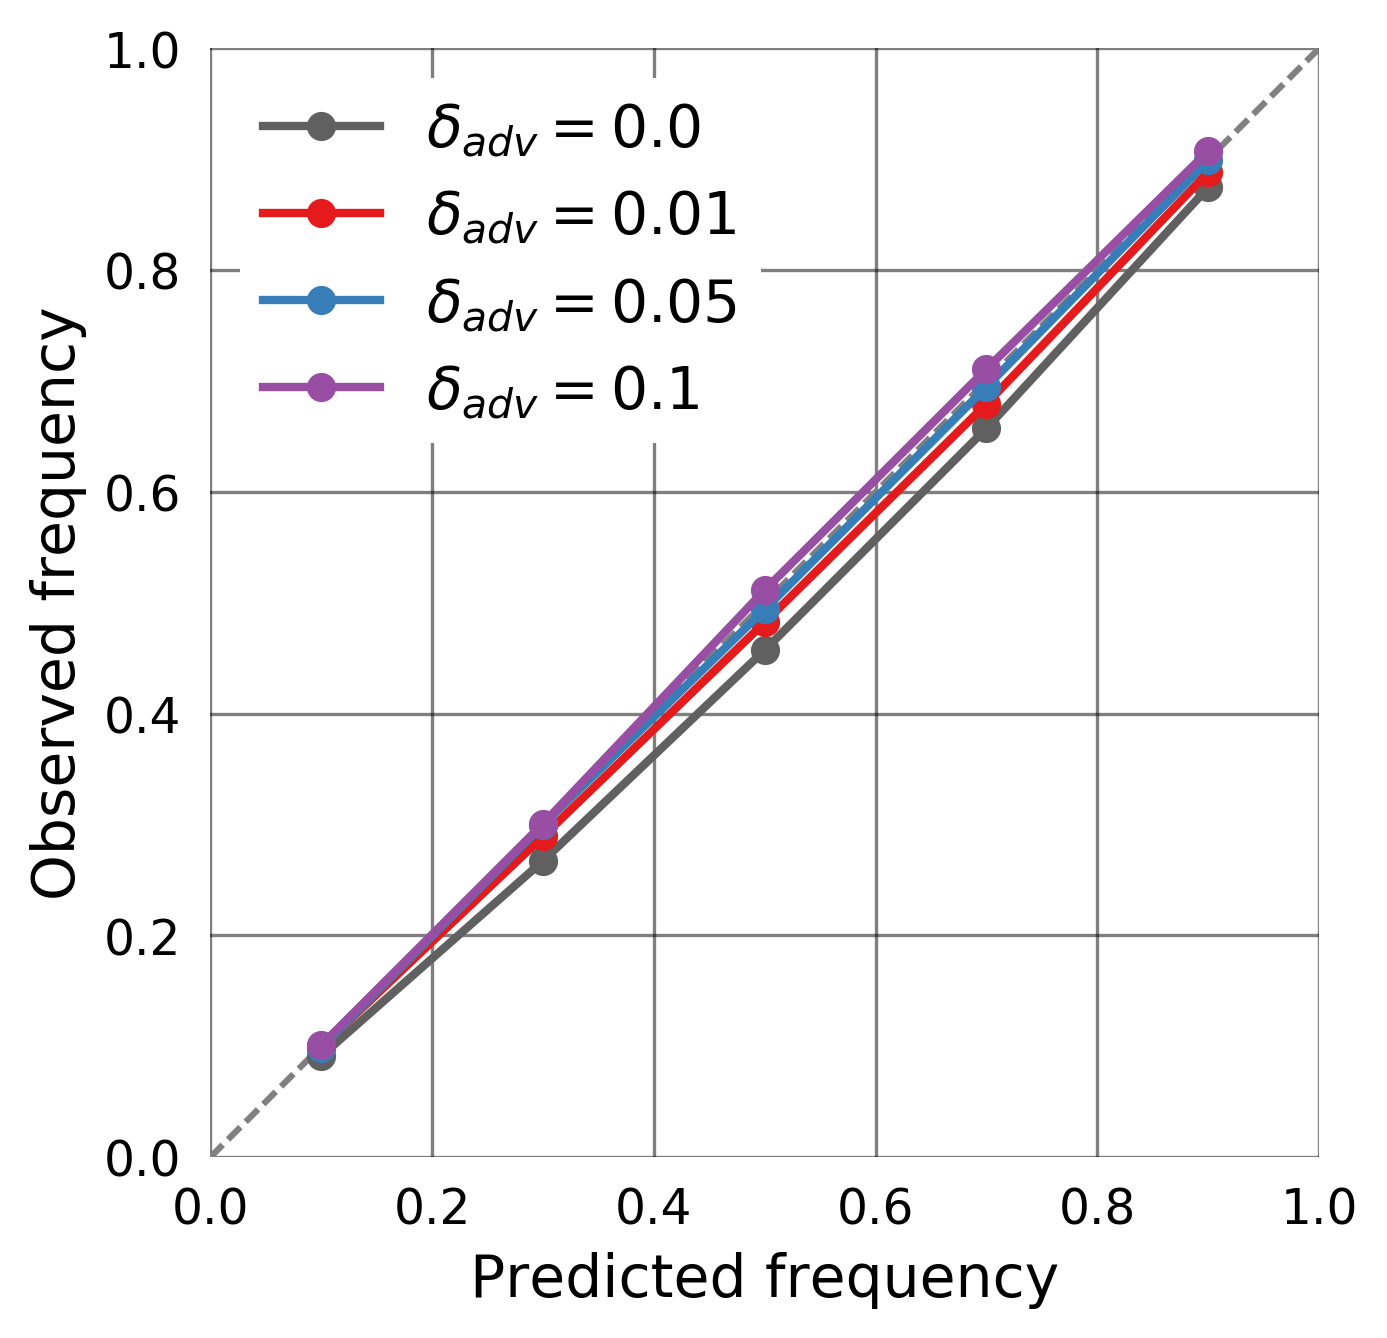

In [12]:
xs = np.arange(0.0, 1.1, 0.1)
plt.plot(xs, xs, c = 'grey', ls = '--')
xs = np.linspace(0.1, 0.9, 5)
plt.plot(xs, fractions[0, :], lw = 2, label = r"$\delta_{adv} = 0.0$", marker = "o")
plt.plot(xs, fractions[3, :], lw = 2, label = r"$\delta_{adv} = 0.01$", marker = "o")
plt.plot(xs, fractions[2, :], lw = 2, label = r"$\delta_{adv} = 0.05$", marker = "o")
plt.plot(xs, fractions[1, :], lw = 2, label = r"$\delta_{adv} = 0.1$", marker = "o")
plt.gca().set_aspect(1)
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel("Predicted frequency")
plt.ylabel("Observed frequency")
#plt.title("Calibration")
plt.legend()
plt.savefig("./plots/validation_calibration.pdf")